# 图像ROI与ROI操作

ROI: region of interest，图像中感兴趣的区域

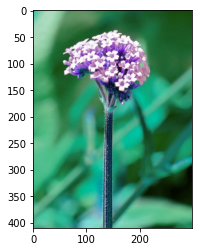

In [33]:
import  cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

src = cv.imread('images/flower.png')
plt.imshow(src)

## 获取ROI

下面代码为只取花图像的中间100x100的区域，首先获取图像的宽和高，之后计算中心点位置`cx`和`cy`，接着计算出图像中心100x100的区域

In [34]:
h, w = src.shape[:2]
cx = w/2
cy = h/2

h, w, cx, cy

(410, 299, 149.5, 205.0)

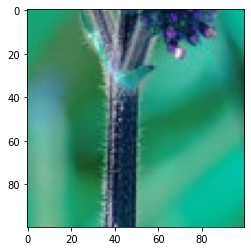

In [35]:
roi = src[np.int(cy-50):np.int(cy+50), np.int(cx-50):np.int(cx+50),:]
plt.imshow(roi)


## 修改ROI

### 将ROI拷贝进行修改
通过`copy`函数拷贝一份ROI，在第三节 [图像对象的创建与赋](003.ipynb)曾介绍过copy操作是将图像数据拿出来新建了一个内存单元存放，脱离原有图片

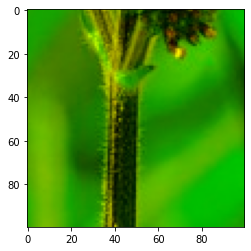

In [36]:
image = np.copy(roi)

image[:,:,2] = 0
plt.imshow(image)

此时原图像src并不会影响

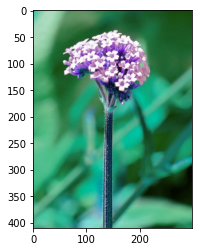

In [37]:
plt.imshow(src)



### 直接修改ROI

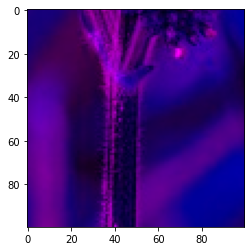

In [38]:
roi[:, :, 1] = 0
plt.imshow(roi)

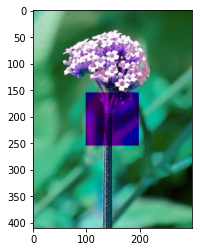

In [39]:
plt.imshow(src)

## 不规则ROI

以之前的绿幕抠图为例，现获取`mask`区域

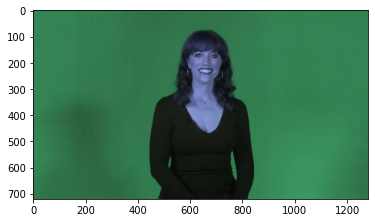

In [62]:
src2 = cv.imread('images/greenback.png')
plt.imshow(src2)

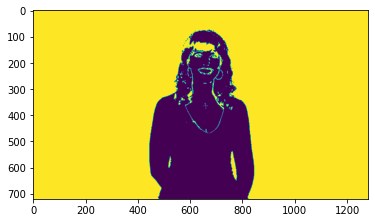

In [63]:
hsv = cv.cvtColor(src2, cv.COLOR_BGR2HSV)
mask = cv.inRange(src2, (35, 43, 46), (77, 255, 255))
plt.imshow(mask)

使用`bitwise_not`获取人像区域

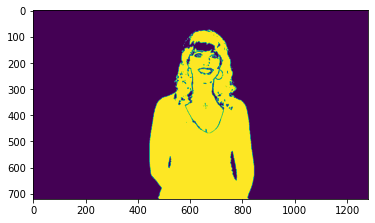

In [64]:
mask = cv.bitwise_not(mask)
plt.imshow(mask)

将原图中的绿幕抠除

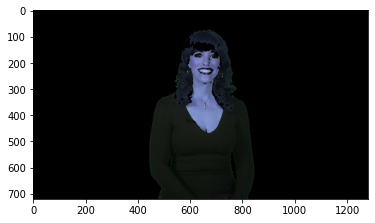

In [65]:
person = cv.bitwise_and(src2, src2, mask=mask)
plt.imshow(person)



更换图像背景，首先创建一个蓝色背景

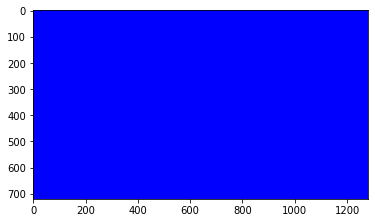

In [66]:
result = np.zeros(src2.shape, src2.dtype)
result[:, :, 2] = 255
plt.imshow(result)

将人物与背景合并

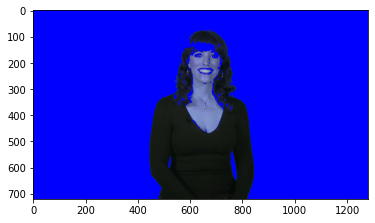

In [67]:
# 获取人物外的区域
mask = cv.bitwise_not(mask)
# 将蓝色背景应用为绿幕区域
dst = cv.bitwise_or(person, result, mask=mask)
# 添加之前抠出的人物图像
dst = cv.add(dst, person)
plt.imshow(dst)



